In [2]:
import pandas as pd
import viz_functions as viz
from scipy.stats import spearmanr

In [3]:
data = pd.read_pickle('Data/data_log_transformed.pkl')
original = pd.read_pickle('Data/data_cleaned.pkl')

In [4]:
labels = {
    '%_FEMALE': 'Share of Female Officers (log1p)',
    '%_BLACK': 'Share of Black Officers (log1p)',
    '%_HISP': 'Share of Hispanic Officers (log1p)',
    'CCRB': 'Share of Officers in CCRB-Covered Agencies (log1p)',
    'CFDBK_POLICY': 'Share of Officers in Agencies Using Community Feedback (log1p)',
    'STD_FORCE_TO_RESIDENT': 'Lethal Force Incidents / 100k Residents (log1p-scaled)',
    'STD_FORCE_TO_CRIME': 'Lethal Force Incidents / 1k Reported Crimes (log1p-scaled)'
}

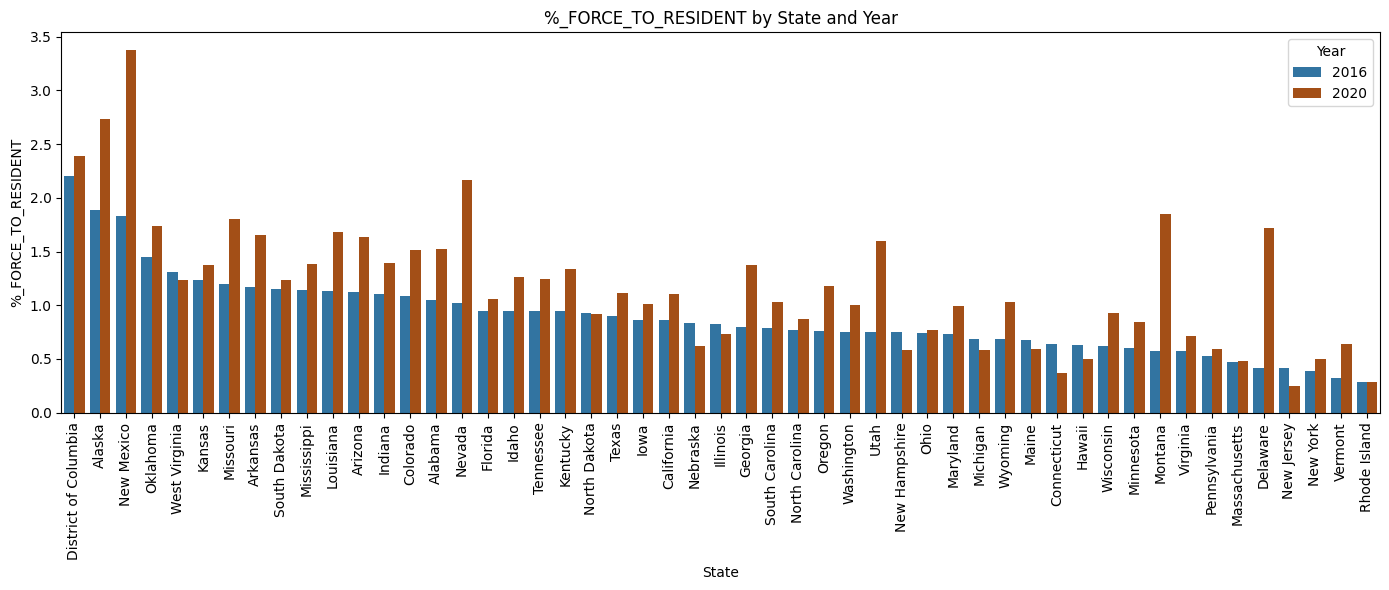

In [5]:
# Figure 1: Lethal Force Incidents per 100k Residents by State and Year
viz.bar_by_state_year( original,'%_FORCE_TO_RESIDENT')

Let’s begin by looking at the overall patterns of lethal force usage across states.
Here we show lethal force incidents per 100,000 residents, comparing data from 2016 (blue) and 2020 (orange) for each U.S. state.
In most states, the 2020 rates are higher than in 2016, suggesting that the use of lethal force has generally increased over time.
States like Alaska, New Mexico, and D.C. stand out with consistently high force rates.
Meanwhile, states like Rhode Island, Vermont, and New York remain consistently low.

This growing trend of force usage provides important context: we are not just interested in what drives high or low force usage at a given moment — we also want to understand why the trend may be getting worse in many places.


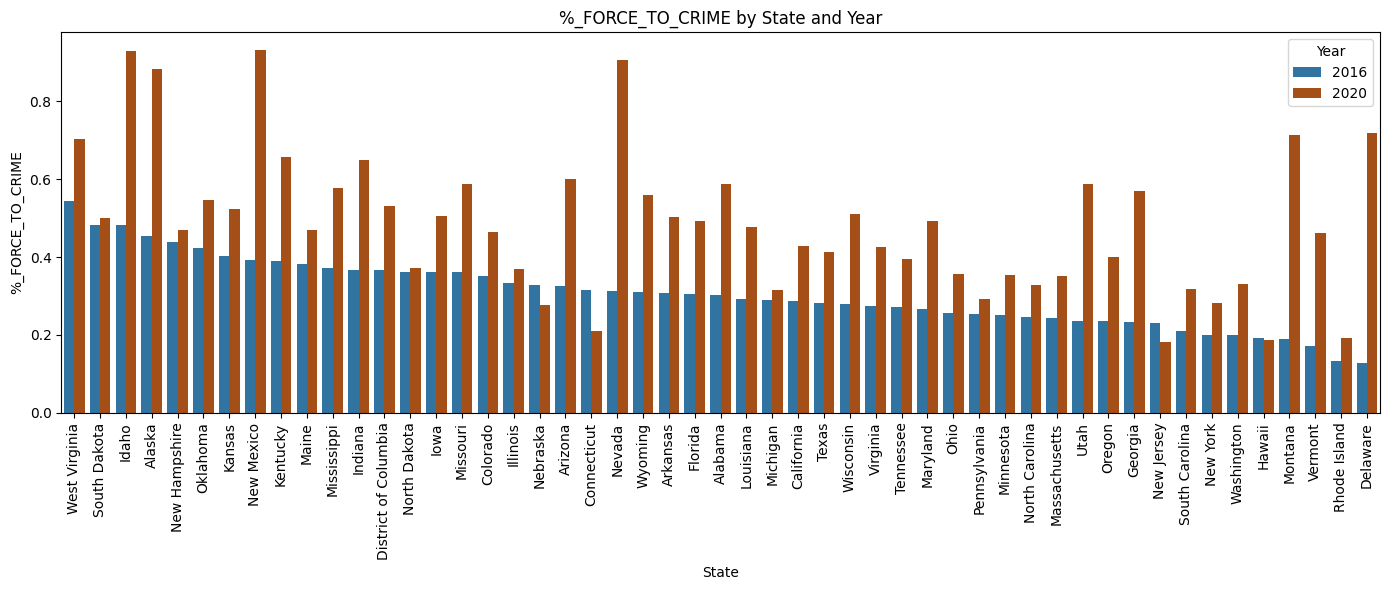

In [6]:
# Figure 2: Lethal Force Incidents per 100k Residents by State and Year
viz.bar_by_state_year( original,'%_FORCE_TO_CRIME')

Now we switch to another normalization method — lethal force incidents per 1,000 reported crimes.
Again, each state is represented with bars for 2016 (blue) and 2020 (orange).
Notable points:
1. The overall trend is similar to the previous chart — most states experienced an increase from 2016 to 2020.
2. The rank order of states differs slightly, highlighting that force-per-crime and force-per-resident measure different dimensions of police use of force.
3. Some states like West Virginia, Alaska, and Nevada remain at the top under both metrics.

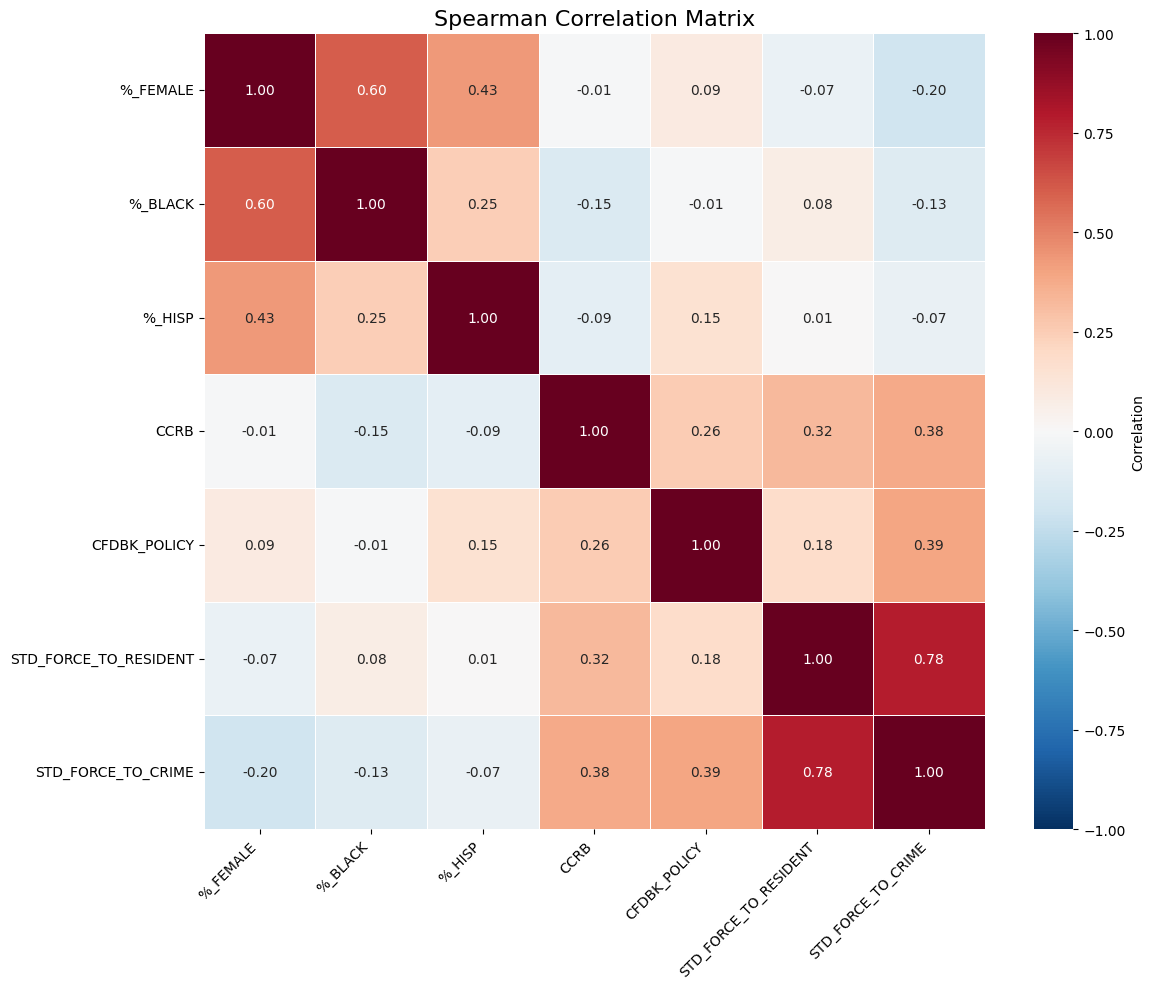

In [7]:
# Figure 3: Spearman Correlation Matrix
corr = data[['%_FEMALE', '%_BLACK', '%_HISP', 'CCRB',
       'CFDBK_POLICY', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']]
viz.plot_correlation_matrix(corr)

## Hypothesis 1 & Hypothesis 4.1 Analysis: Share of Female Officers vs. Lethal Force Incidents


### State level analysis
 *States that have a higher proportion of female officers will have a less lethal force incidents per year.*

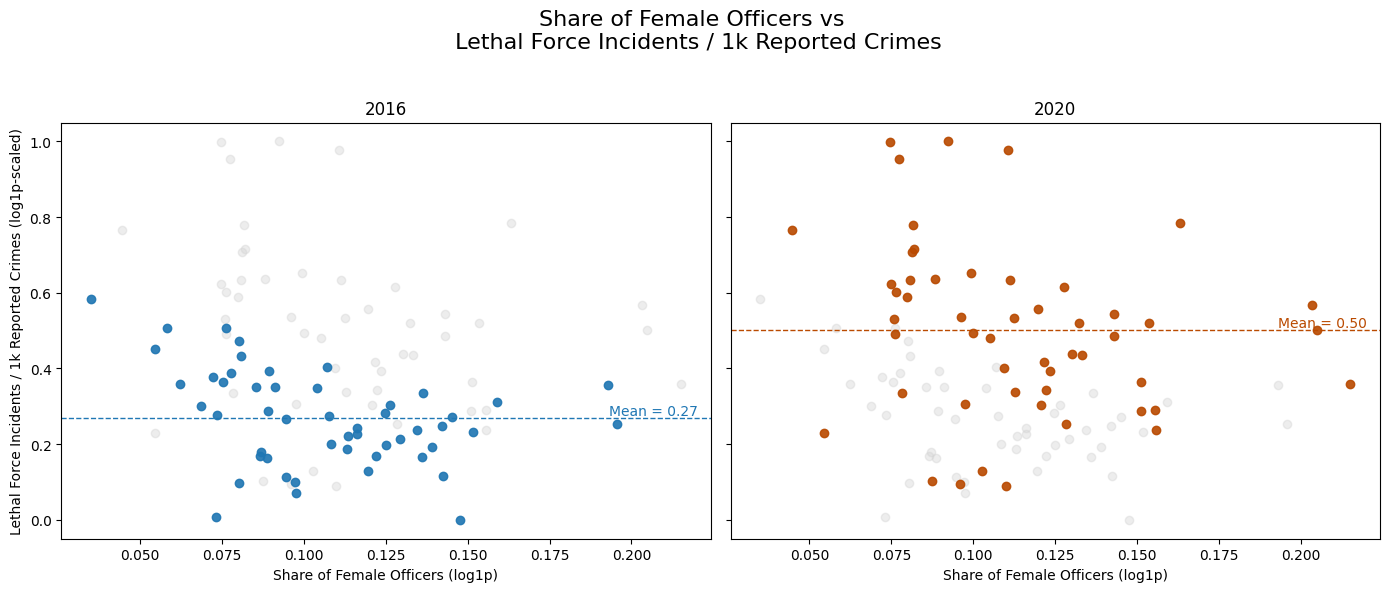

In [8]:
viz.scatter_dual_year_highlight(data, '%_FEMALE','STD_FORCE_TO_CRIME', label_map= labels)

In this plot, each dot represents a U.S. state, where we’ve aggregated data across all police agencies within the state.
The Key observations here are:
1. The average incident rate increased from 0.27 in 2016 to 0.50 in 2020.
2. However, we do not observe a clear negative trend across either year — states with higher female officer shares are not consistently seeing fewer lethal force incidents.


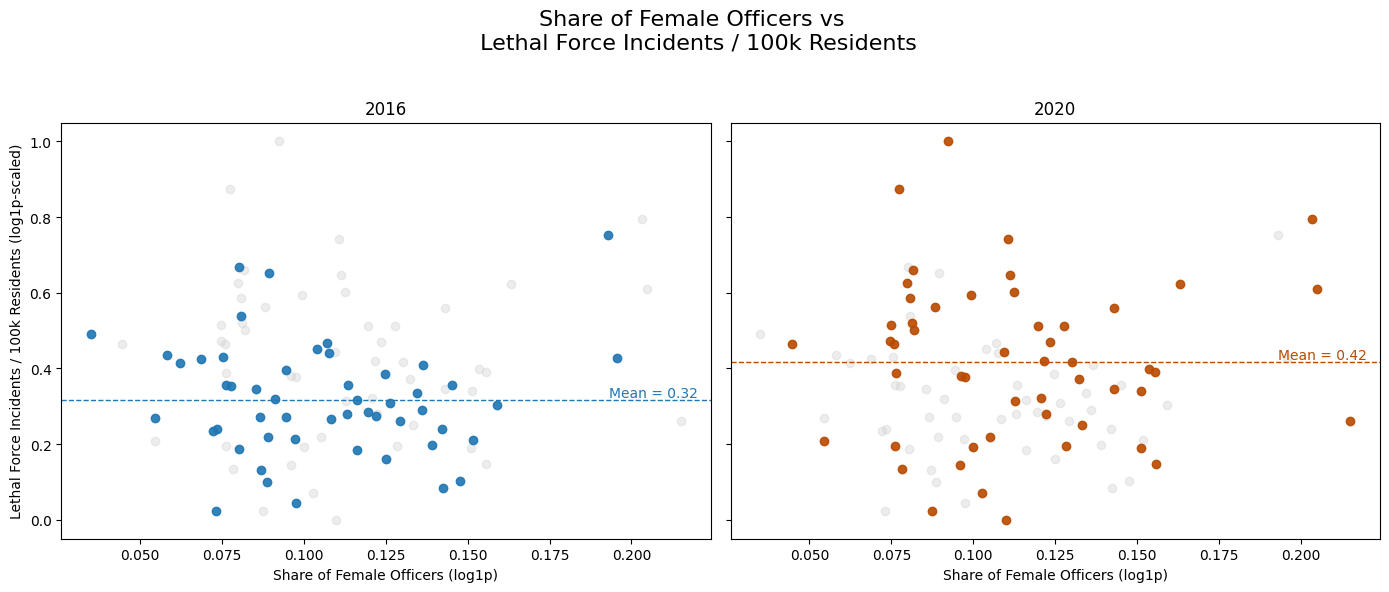

In [9]:
viz.scatter_dual_year_highlight(data, '%_FEMALE','STD_FORCE_TO_RESIDENT', label_map= labels)

We also explored an alternative normalization method which is lethal force incidents per 100,000 residents.
Findings here:
1. Mean incident rates rose from 0.32 in 2016 to 0.42 in 2020
2. The visual pattern remains largely scattered, with no strong downward association between female officer share and lethal force incidents.

This suggests that our findings are robust across normalization methods, and the lack of a strong linear pattern is consistent.

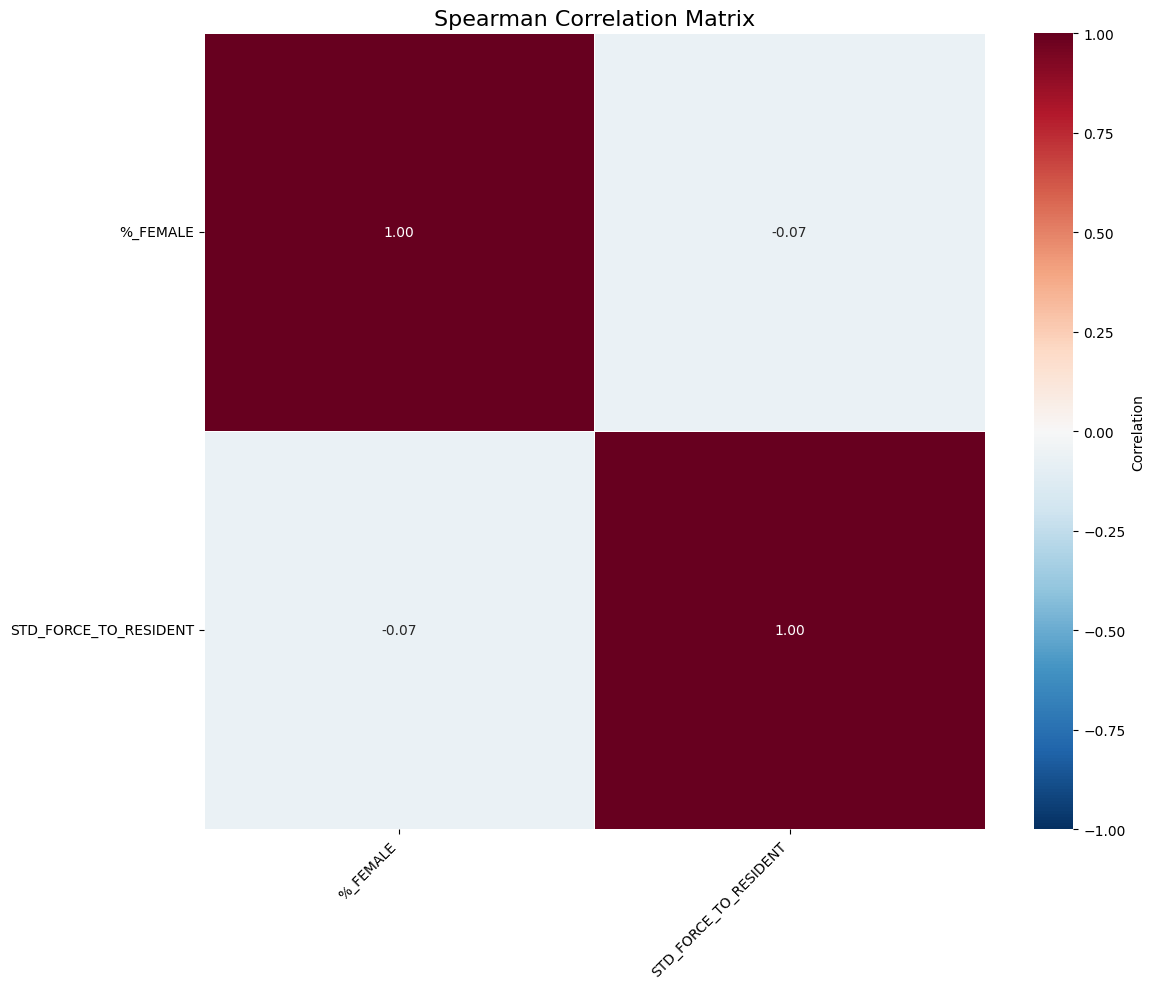

In [10]:
corr = data[['%_FEMALE', 'STD_FORCE_TO_RESIDENT']]
viz.plot_correlation_matrix(corr)

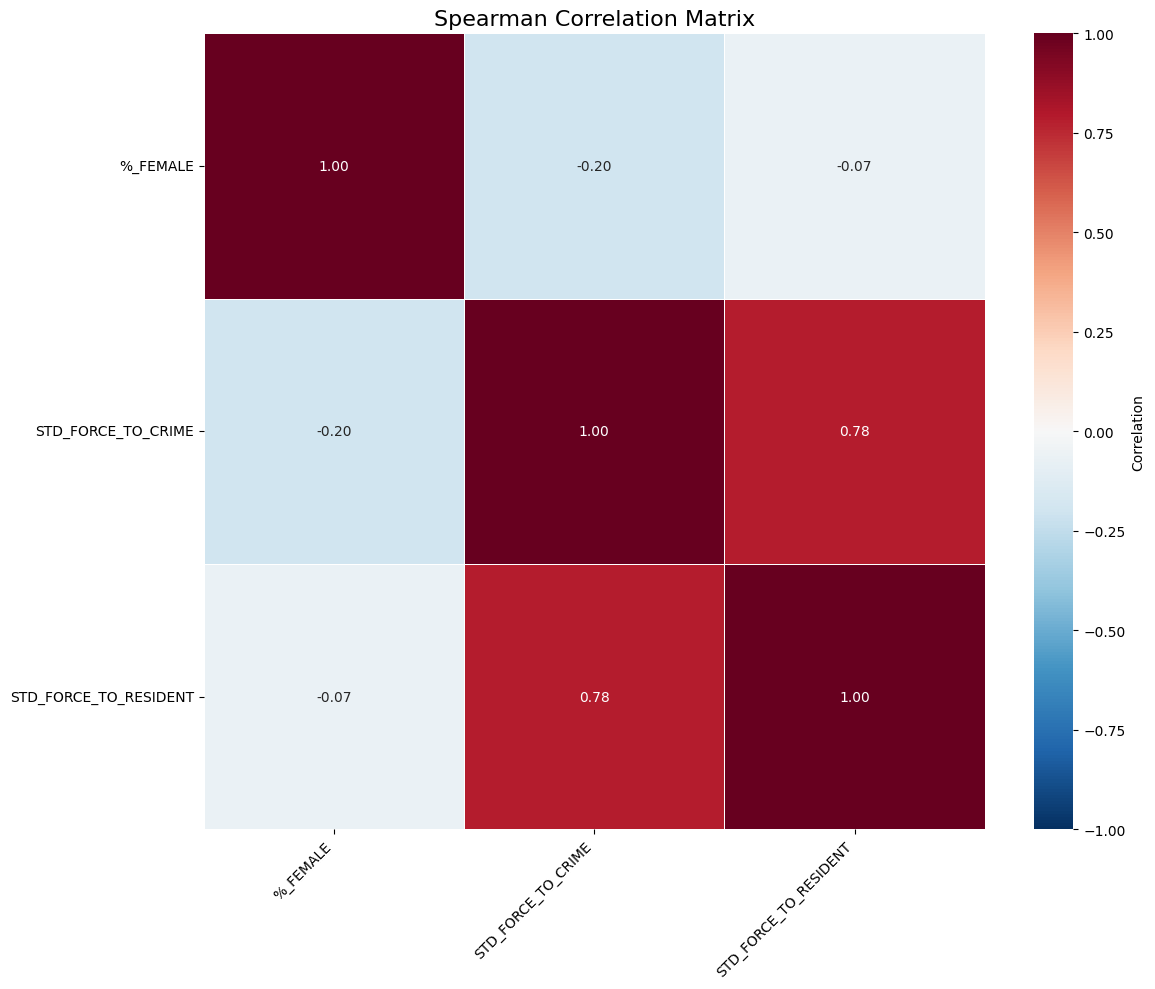

In [11]:
corr = data[['%_FEMALE', 'STD_FORCE_TO_CRIME', 'STD_FORCE_TO_RESIDENT']]
viz.plot_correlation_matrix(corr)

To statistically test this relationship, we ran Spearman correlations between the percentage of female officers and both outcome variables.
From this combined view:
1. %_FEMALE has a negative correlation with both outcome variables: r = -0.20 with force-to-crime, r = -0.07 with force-to-resident.
2. But these relationships are weak by conventional thresholds (|r| < 0.3).
3. Visually, we also see stronger internal correlation between the two outcome metrics themselves (r = 0.78), which is expected.

So, while there is a directionally negative trend, it doesn’t reach a strength that would strongly support Hypothesis 1 on its own.


In [12]:
for year in [2016, 2020]:
    year_sub = data[data['YEAR'] == year]
    r, p = spearmanr(year_sub['%_FEMALE'], year_sub['STD_FORCE_TO_RESIDENT'])
    print(f"Year {year}: Spearman r = {r:.3f}, p = {p:.3f}")

Year 2016: Spearman r = -0.139, p = 0.330
Year 2020: Spearman r = -0.072, p = 0.615


In [13]:
for year in [2016, 2020]:
    year_sub = data[data['YEAR'] == year]
    r, p = spearmanr(year_sub['%_FEMALE'], year_sub['STD_FORCE_TO_CRIME'])
    print(f"Year {year}: Spearman r = {r:.3f}, p = {p:.3f}")

Year 2016: Spearman r = -0.396, p = 0.004
Year 2020: Spearman r = -0.307, p = 0.028


2016


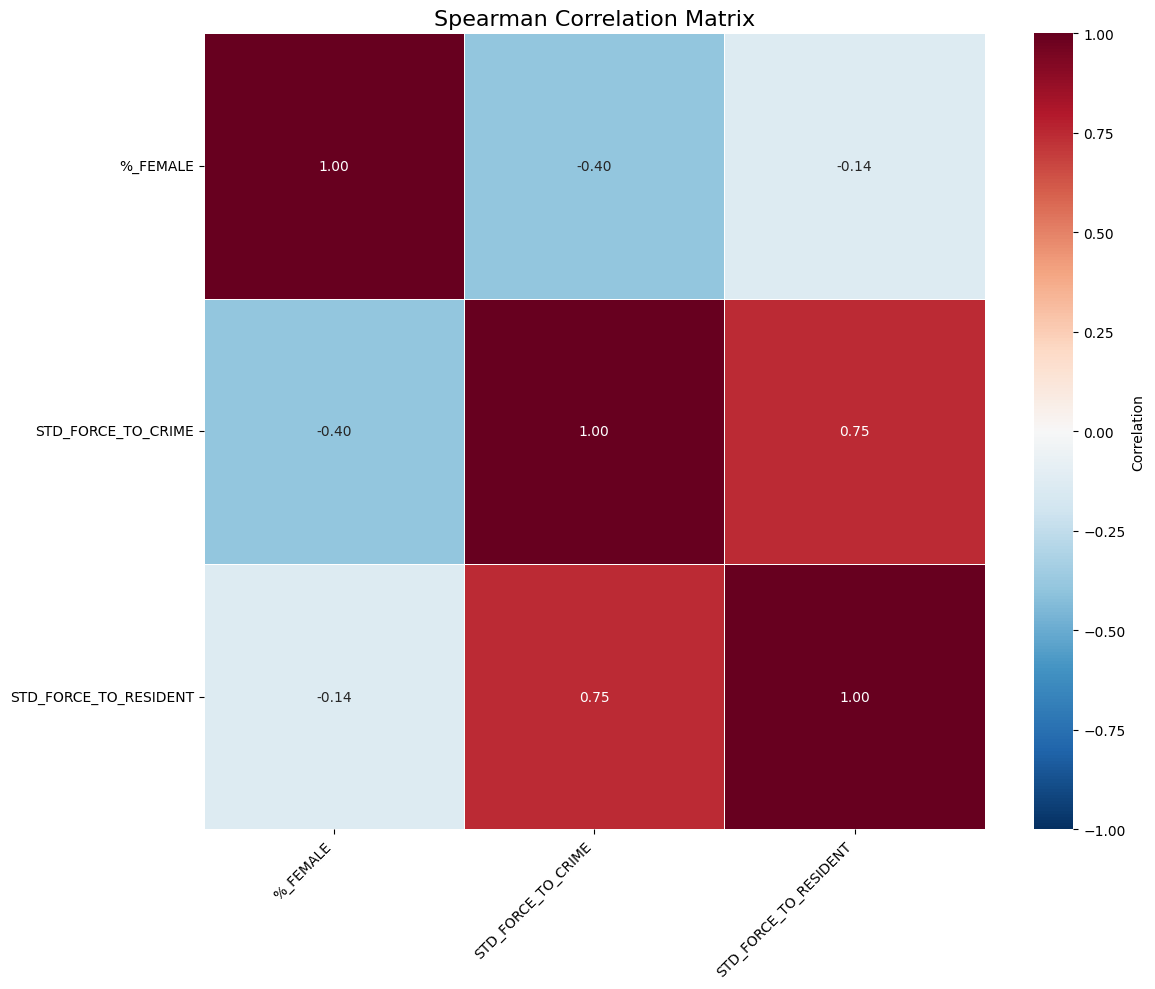

2020


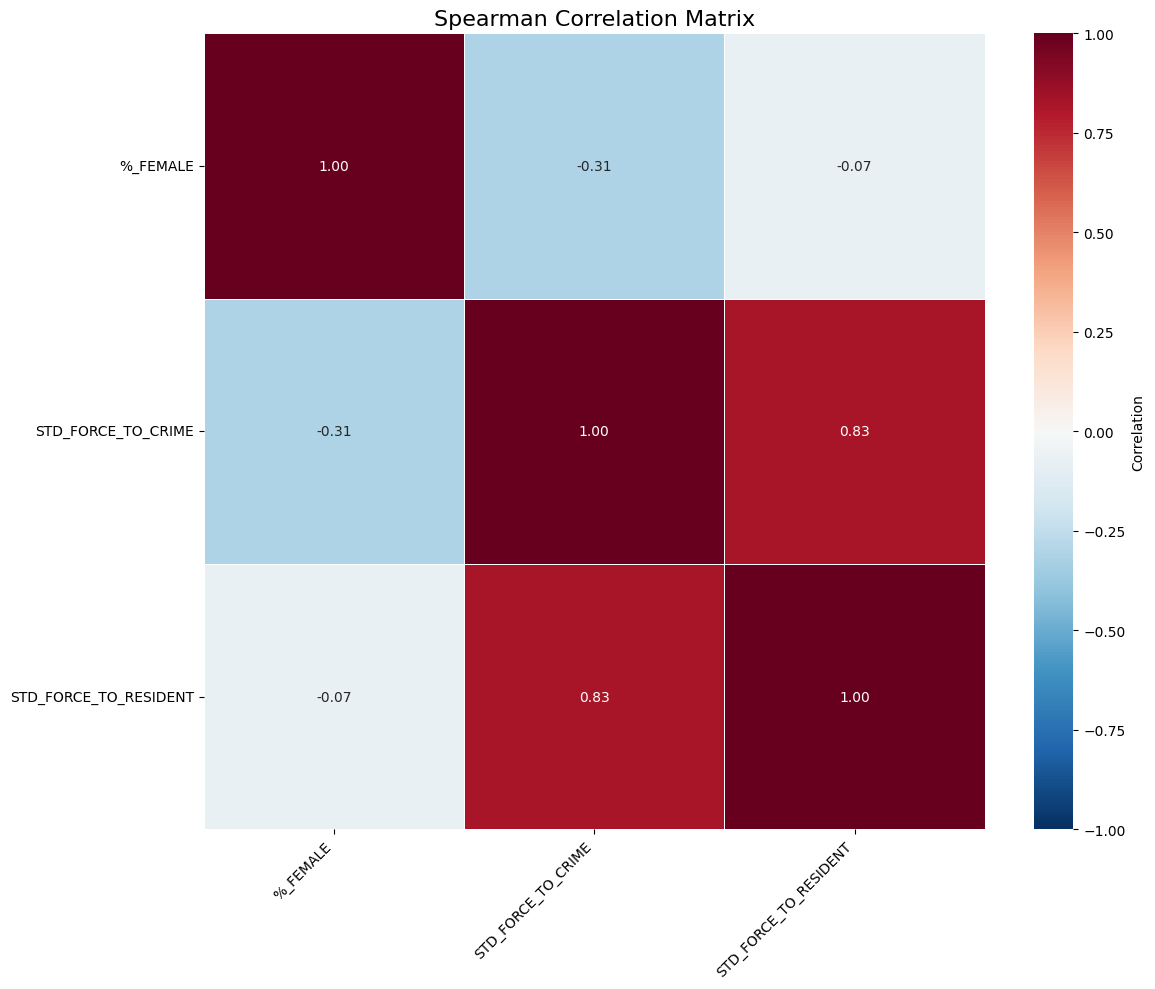

In [14]:
for year in [2016, 2020]:
    print(year)
    year_sub = data[data['YEAR'] == year]
    corr = year_sub[['%_FEMALE', 'STD_FORCE_TO_CRIME', 'STD_FORCE_TO_RESIDENT']]
    viz.plot_correlation_matrix(corr)

Looking at each year separately, we can tell that:
1. Hypothesis 1: Partially supported.
Only one of the two outcome measures—lethal force per 1,000 crimes—shows consistent and significant negative correlation with female officer share.
2. Hypothesis 4.1: Not supported.
We expected the association to grow stronger in 2020, reflecting organizational shifts. But in reality, the relationship became weaker, and p-values rose—indicating reduced confidence.

Thus, the data suggests some connection between female representation and reduced use of force, but it is sensitive to measurement method and time, and does not robustly improve over time.


### County level analysis
*Counties that have a higher proportion of female officers will have a less lethal force incidents per year.*

## Hypothesis 2 & Hypothesis 4.2 Analysis: Minority Officer Representation vs. Lethal Force Incidents

### State level analysis
*States that have a higher proportion of minority officers (Black, Latino) are less likely to be involved in lethal force incidents.*

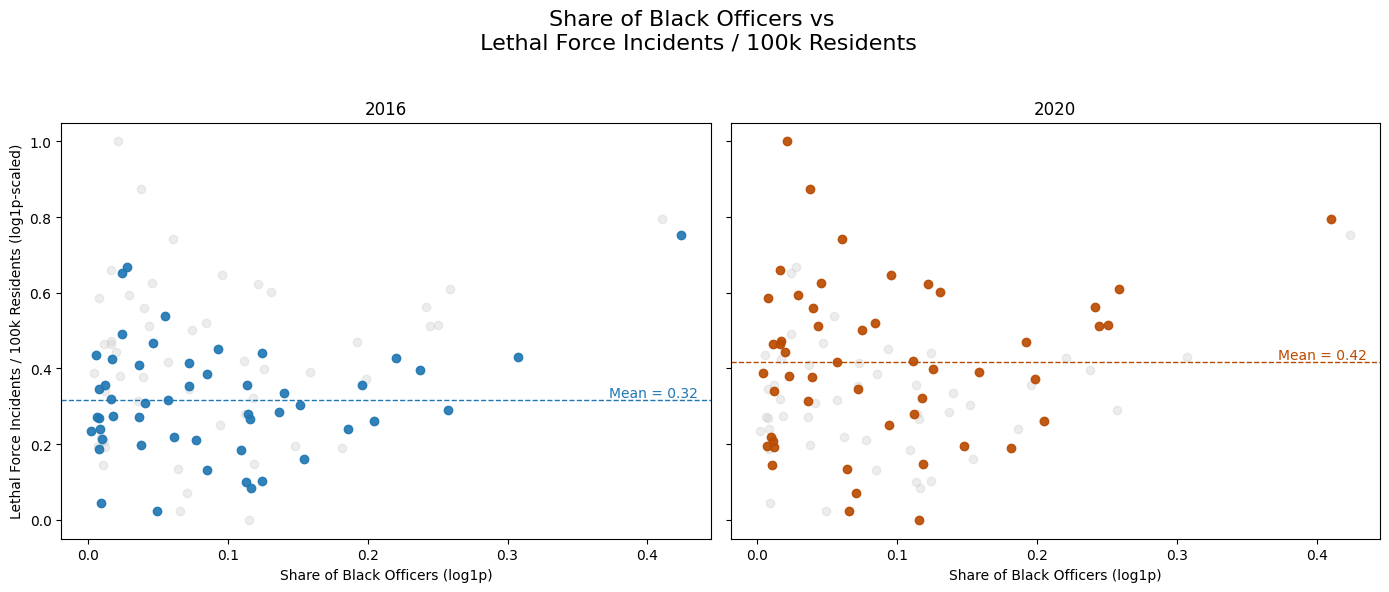

In [15]:
viz.scatter_dual_year_highlight(data, '%_BLACK','STD_FORCE_TO_RESIDENT', label_map= labels)

Both the plots suggest a weakening of any potential relationship. Overall, these visuals support the idea that higher Black officer representation does not significantly reduce lethal force incidents, at least when measured per capita.

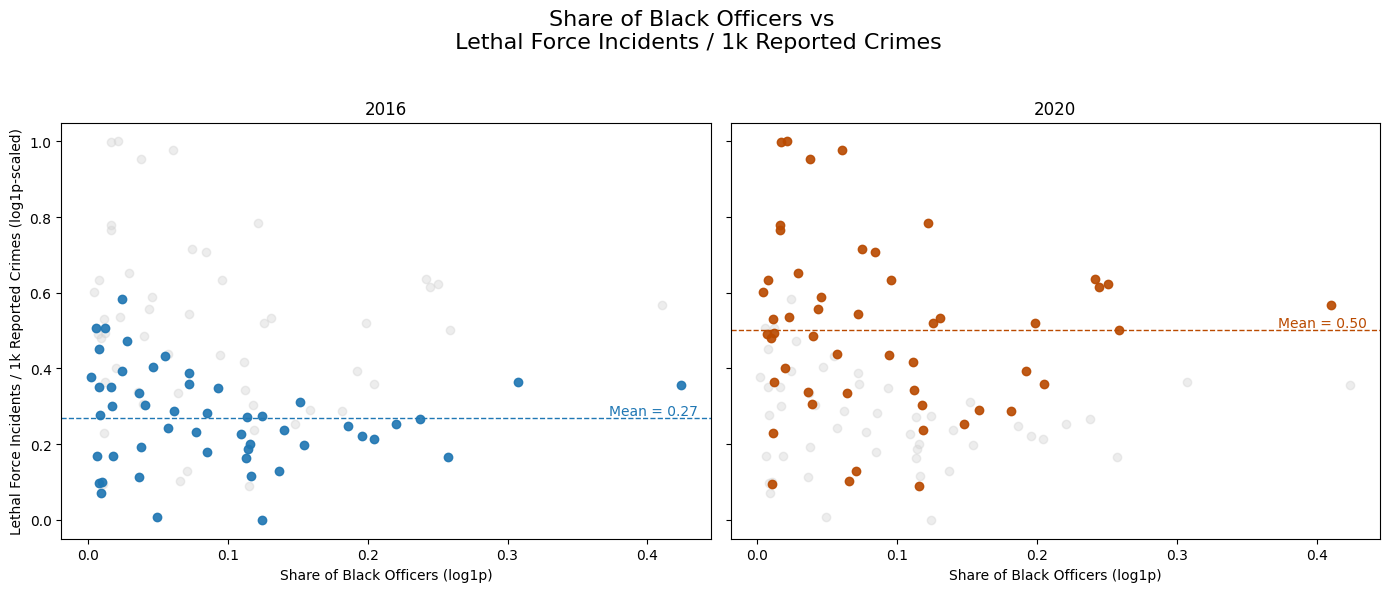

In [16]:
viz.scatter_dual_year_highlight(data, '%_BLACK','STD_FORCE_TO_CRIME', label_map= labels)

We now shift from a population-based normalization to one based on crime incidents. Here, we’re examining lethal force incidents per 1,000 reported crimes. Again, both plots for 2016 and 2020 show a weak and inconsistent relationship. The data points remain scattered with no obvious correlation. These results weaken support for Hypothesis 2.

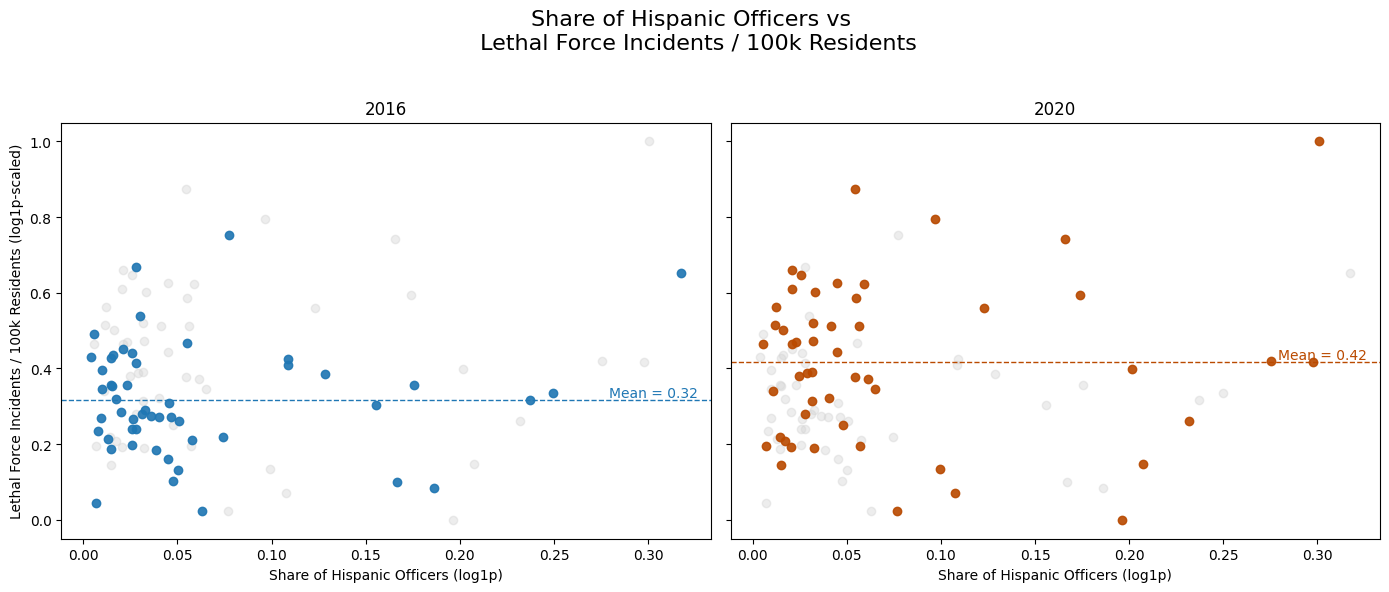

In [17]:
viz.scatter_dual_year_highlight(data, '%_HISP','STD_FORCE_TO_RESIDENT', label_map= labels)

Here we focus on the relationship between the percentage of Hispanic officers and lethal force incidents per 100,000 residents. Once again, in both 2016 and 2020, the data points are scattered with no clear slope or pattern in the plots. The average incident rate line provides some reference, but it doesn’t reveal any compelling evidence of a downward or upward trend tied to officer demographics. These results align with what we observed for Black officer representation that diversity alone doesn’t correlate strongly with reduced lethal force.

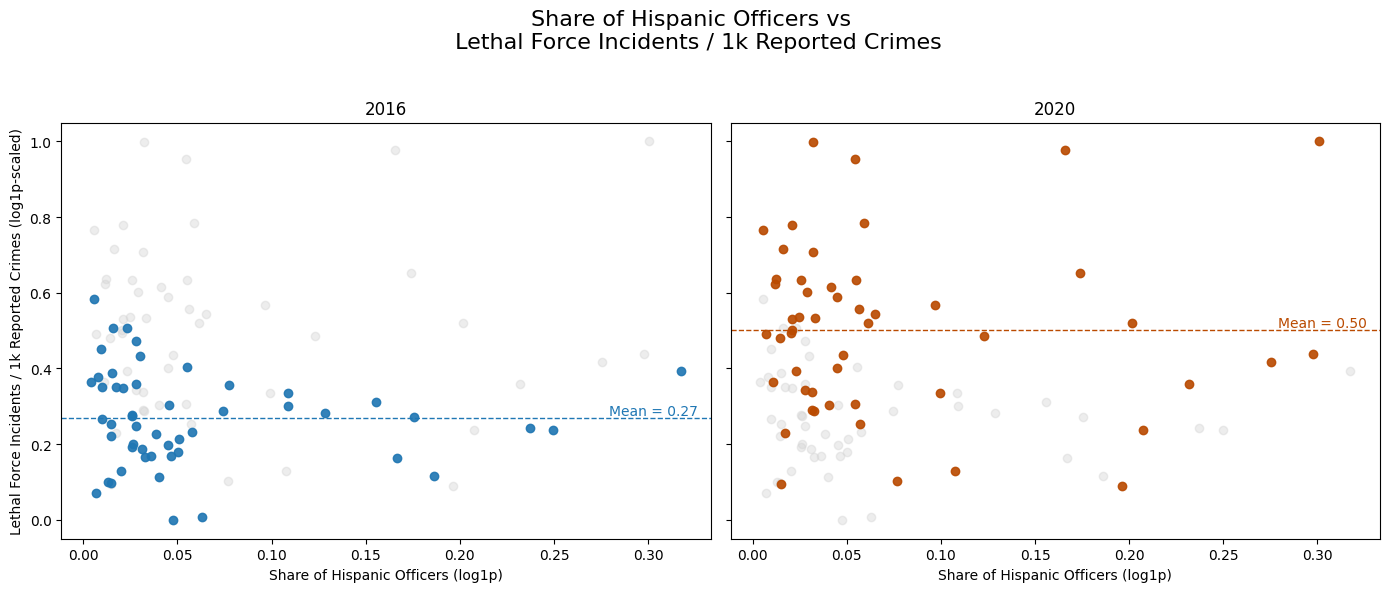

In [18]:
viz.scatter_dual_year_highlight(data, '%_HISP','STD_FORCE_TO_CRIME', label_map= labels)

When we normalize lethal force by crime incidents, the relationship with Hispanic officer representation remains weak. Both the 2016 and 2020 plots show weak visual correlation. The data points continue to be scattered with a flat trendline. This again reinforces that officer race or ethnicity, by itself, is not a statistically significant predictor of how often force is used, at least when analyzed at the state level using these variables.

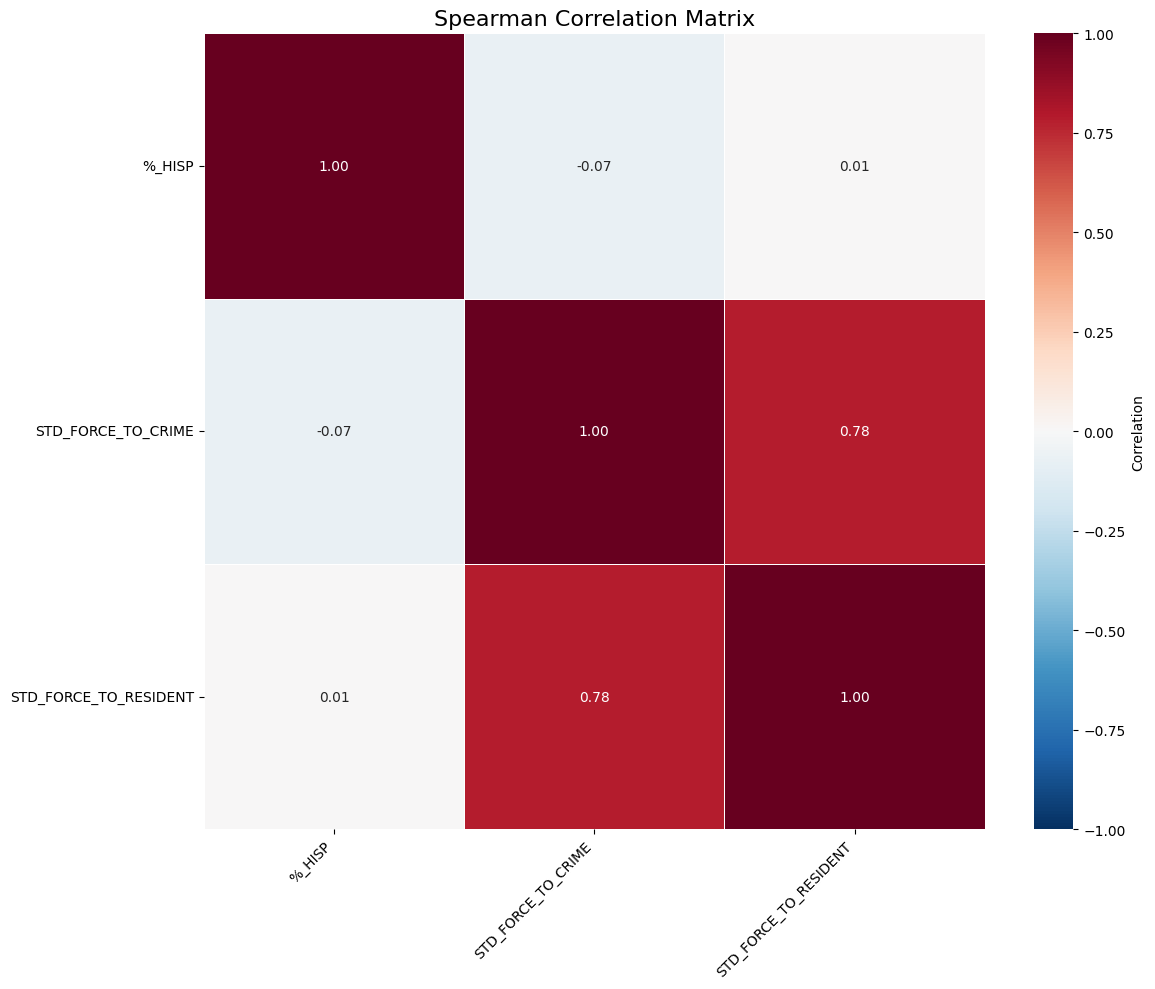

In [25]:
corr = data[['%_HISP', 'STD_FORCE_TO_CRIME', 'STD_FORCE_TO_RESIDENT']]
viz.plot_correlation_matrix(corr)

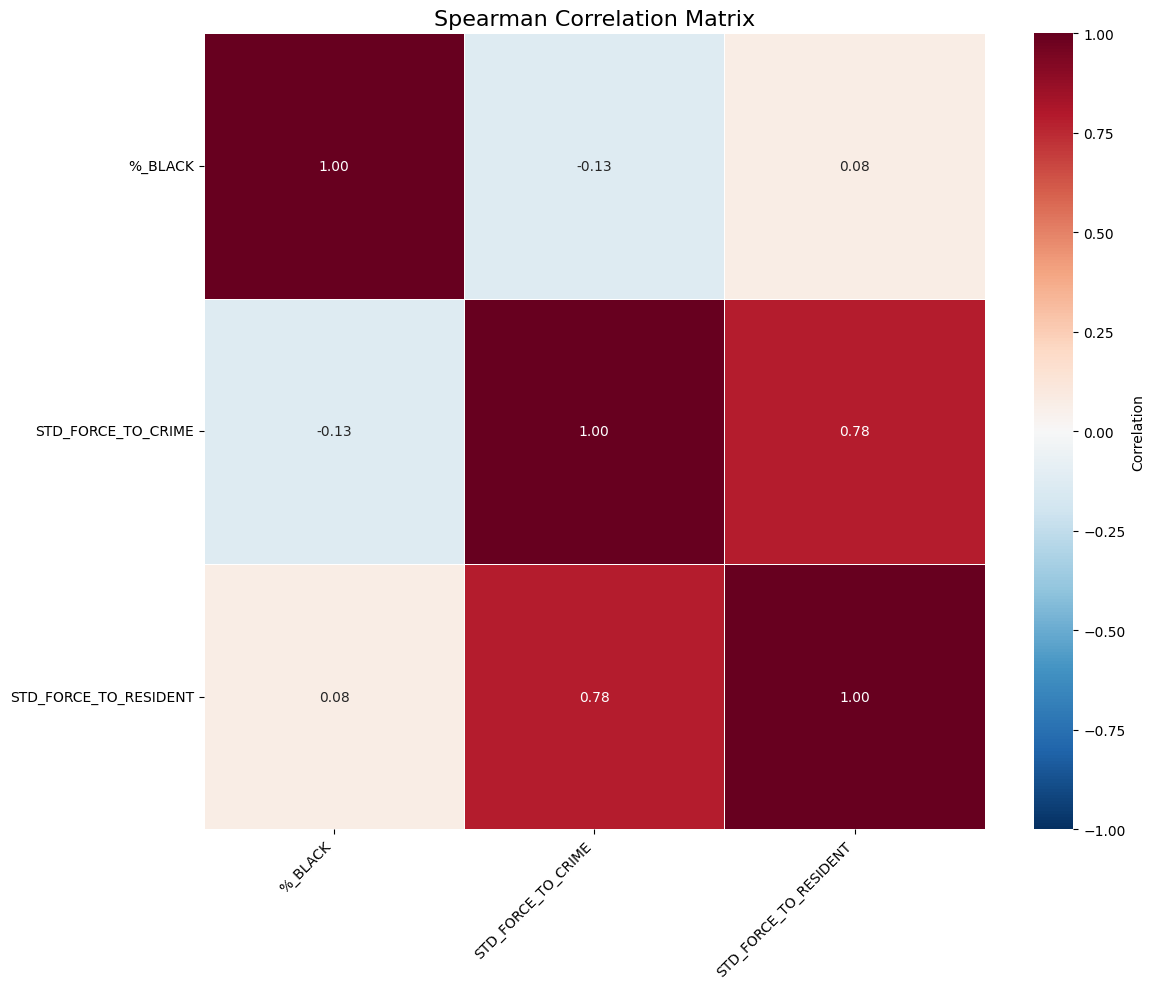

In [26]:
corr = data[['%_BLACK', 'STD_FORCE_TO_CRIME', 'STD_FORCE_TO_RESIDENT']]
viz.plot_correlation_matrix(corr)

To summarize this entire analysis, we’ve presented the Spearman correlation coefficients for each pairing: %Black and %Hispanic officers against both normalization methods per residents and per crimes. Across all four combinations and both years, the correlation values are close to zero, and more importantly, all p-values exceed 0.05, meaning none of the results are statistically significant. Therefore Hypothesis 2 is partially supported as minority officer representation shows no consistent or meaningful relationship with reduced lethal force incidents. Hypothesis 4.2 is not supported. The strength of this relationship did not increase in 2020. These findings suggest that while diversity may matter symbolically, it doesn’t appear to drive force-related outcomes in a measurable way in this data.

### County level analysis
*Counties that have a higher proportion of minority officers (Black, Latino) are less likely to be involved in lethal force incidents.*

## Hypothesis 3 & Hypothesis 4.3 Analysis: Civilian Complaint Review Board (CCRB) Presence vs. Lethal Force Incidents

### State level analysis
*States where a greater share of officers are employed in agencies with a civilian complaint review board will have a less lethal force incidents per year.*

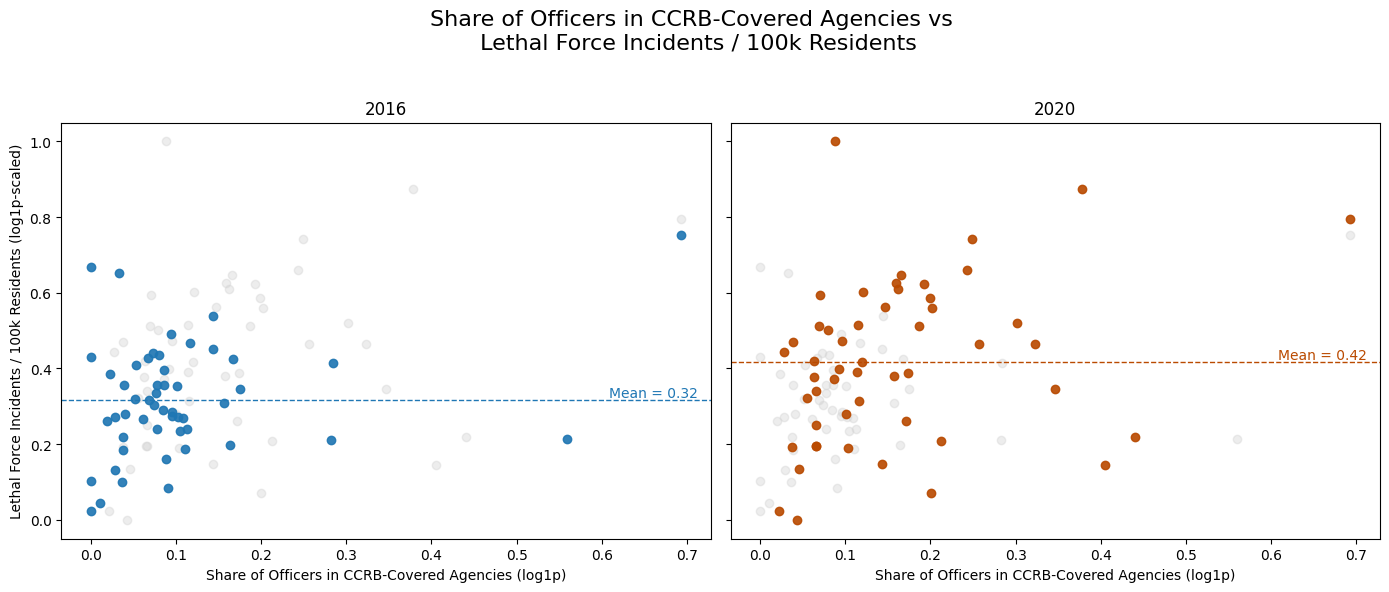

In [19]:
viz.scatter_dual_year_highlight(data, 'CCRB','STD_FORCE_TO_RESIDENT', label_map= labels)

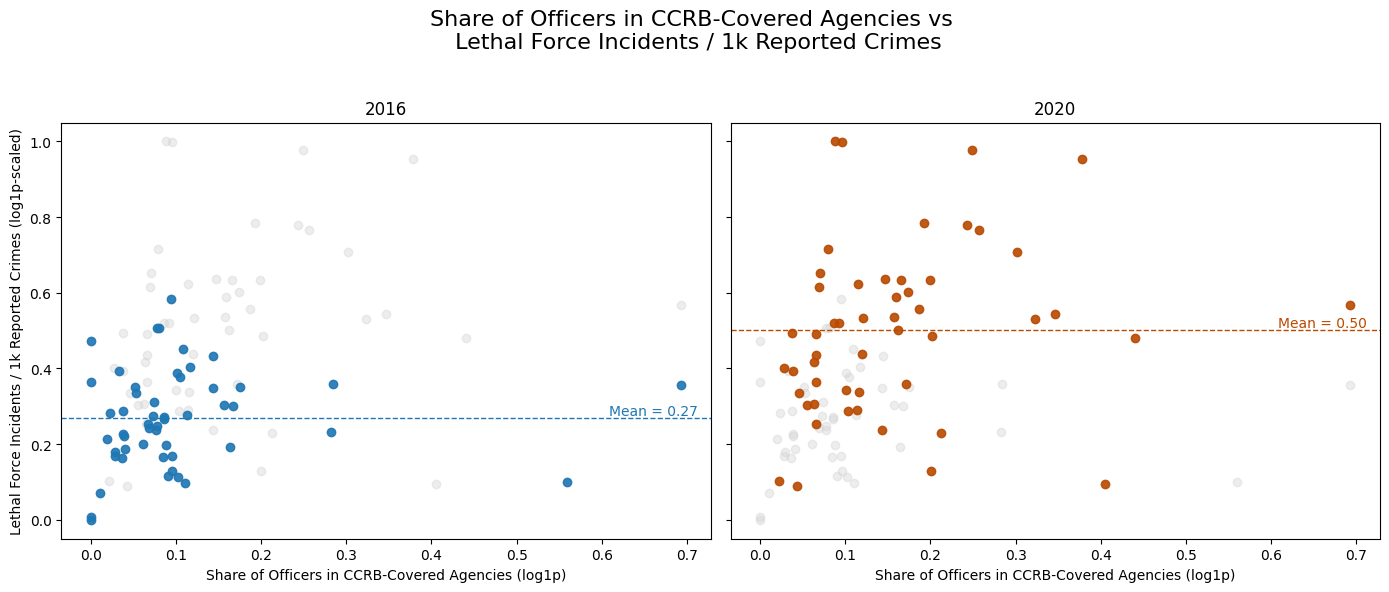

In [20]:
viz.scatter_dual_year_highlight(data, 'CCRB','STD_FORCE_TO_CRIME', label_map= labels)

The scatter plots show that the relationship between CCRB coverage and lethal force rates isn’t very linear. Some states with low CCRB coverage had the highest rates, and the one with full coverage still had above-average use of force. When comparing across years, CCRB coverage appears to have increased: in 2016, most states were clustered on the lower end, while in 2020, the points are more spread out and extend further to the right, suggesting broader or more varied adoption across states.

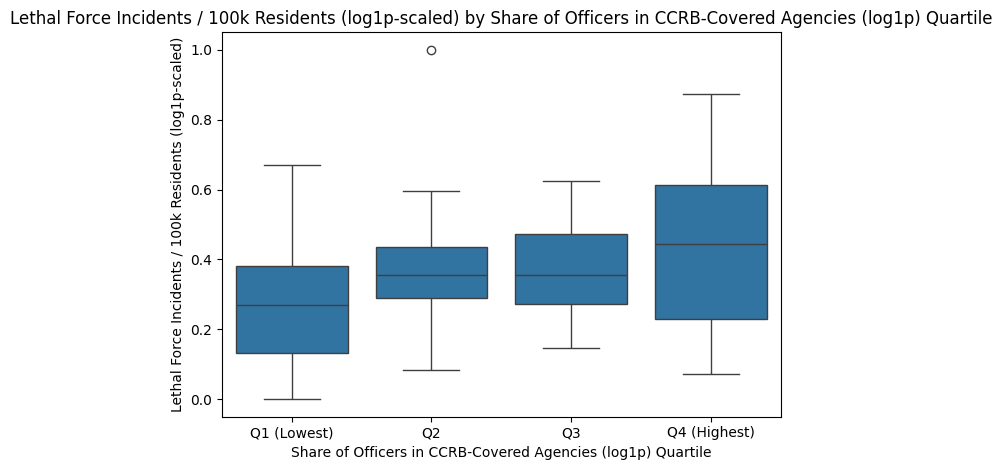

In [21]:
viz.plot_quartile_boxplot(data, x_var='CCRB', y_var='STD_FORCE_TO_RESIDENT', label_map=labels)

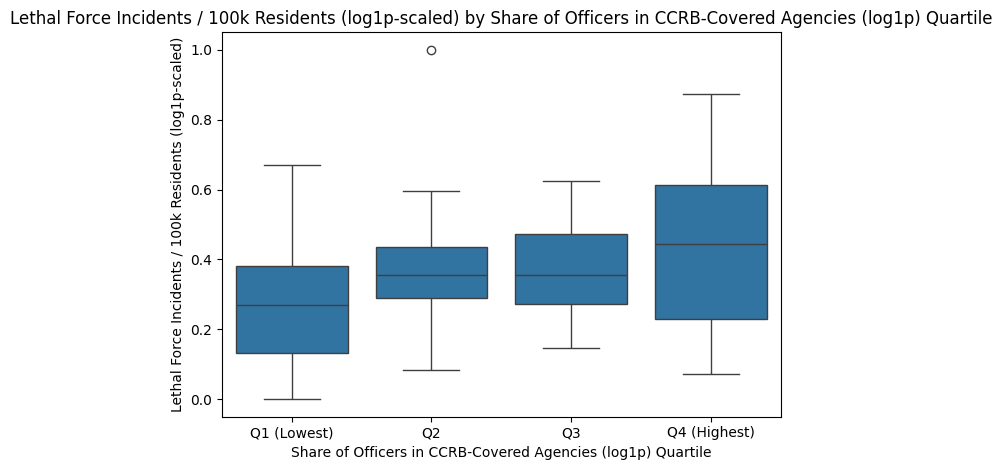

In [22]:
viz.plot_quartile_boxplot(data, x_var='CCRB', y_var='STD_FORCE_TO_RESIDENT', label_map=labels)

The boxplot shows that states in higher CCRB coverage quartiles tend to have higher median lethal force rates. There's notable overlap and an outlier in Q2—a state with low CCRB coverage but the highest force rate (scaled to 1)—suggesting the relationship isn’t consistent across all states.

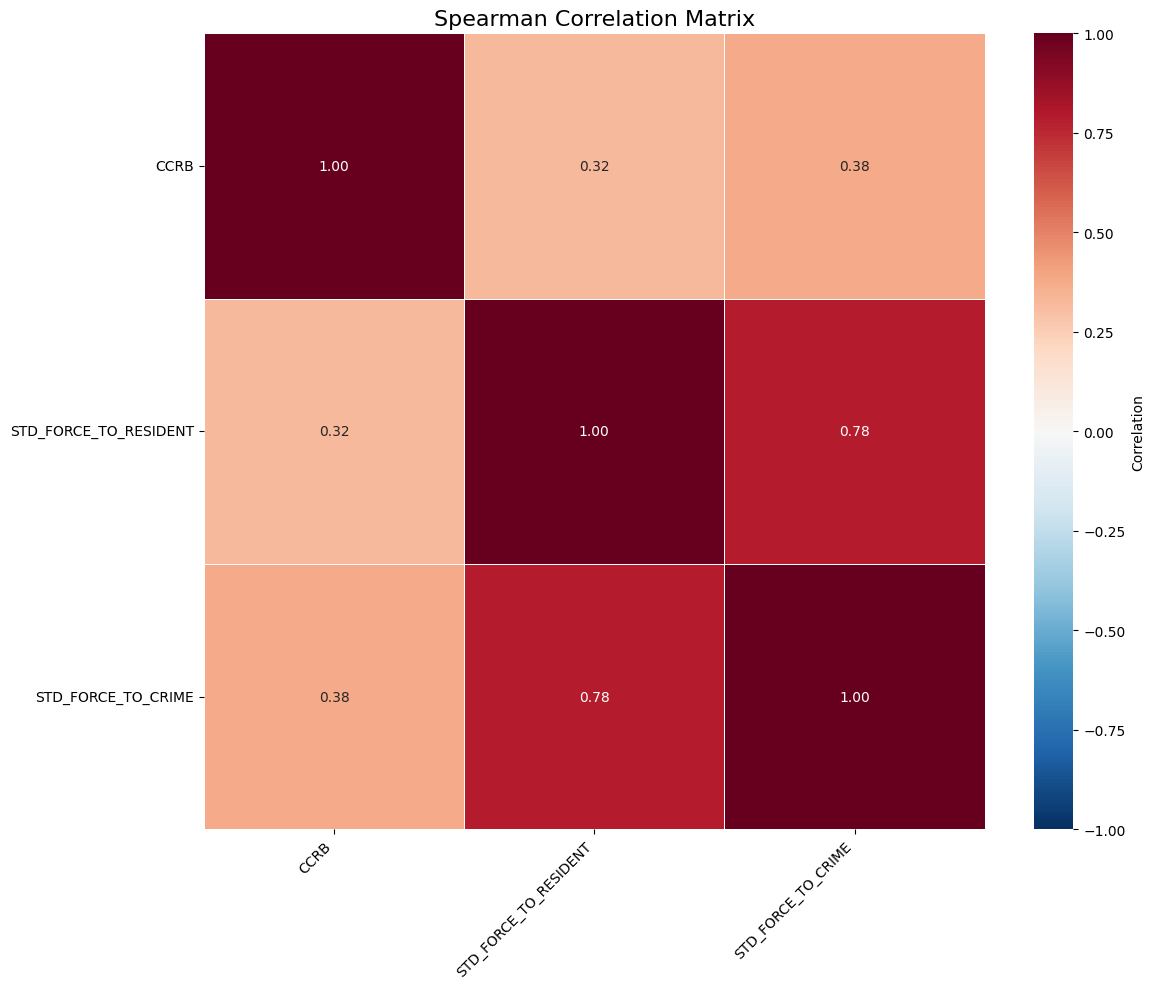

In [23]:
corr = data[['CCRB','STD_FORCE_TO_RESIDENT','STD_FORCE_TO_CRIME']]
viz.plot_correlation_matrix(corr)

From the spearman correlations we can see a **moderate positive relationship** (Spearman’s ρ = 0.38), suggesting that states with greater CCRB presence tend to have higher rates of lethal force incidents. This goes against our expectation that more accountability (via CCRBs) would be linked to lower lethal force rates, this likely because CCRBs are being implemented reactively in response to high number of use-of-force incidents and as we saw from bar plots lethal force rates were generally higher in 2020. We look more closely at difference in correlation between 2016 and 2020:

In [24]:
for col in ['STD_FORCE_TO_RESIDENT','STD_FORCE_TO_CRIME']:
    print(f'{col} vs. CCRB')
    for year in [2016, 2020]:
        year_sub = data[data['YEAR'] == year]
        r, p = spearmanr(year_sub['CCRB'], year_sub[col])
        print(f"Year {year}: Spearman r = {r:.3f}, p = {p:.3f}")

STD_FORCE_TO_RESIDENT vs. CCRB
Year 2016: Spearman r = 0.163, p = 0.254
Year 2020: Spearman r = 0.360, p = 0.009
STD_FORCE_TO_CRIME vs. CCRB
Year 2016: Spearman r = 0.212, p = 0.135
Year 2020: Spearman r = 0.357, p = 0.010


The relationship between CCRB coverage and standardized lethal force rates strengthened from 2016 to 2020. In both population- and crime-normalized metrics, the 2020 correlations were moderate and statistically significant, while 2016 showed weaker, non-significant results. This **supports Hypothesis 4**, though the positive direction of the relationship **contradicts Hypothesis 3**.

### County level analysis
*Counties where a greater share of officers are employed in agencies with a civilian complaint review board will have a less lethal force incidents per year.*